In [1]:
import bert_score
bert_score.__version__

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


'0.3.12'

In [2]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [4]:
from bert_score import score

In [5]:
import os

# Gets the user's home directory
home_dir = os.path.expanduser("~")

# Constructs the path to the folder containing the different GPT descriptions for each model
documents_folder = os.path.join(
    "C:\\Users\\User\\OneDrive\\Desktop\\Documents\\Summer Internship\\BERT Score Files\\All GPT Prompt Responses")

# Constructs the full paths to the files
actual_path = os.path.join(documents_folder, "All Actual Descriptions with SysMLv2 Code.txt")
control_path = os.path.join(documents_folder, "All Control Code to Text Responses.txt")
interpreter_path = os.path.join(documents_folder, "All Code Interpreter Responses.txt")
translator_path = os.path.join(documents_folder, "All Actual with Code Translator JSON.txt")
mistral_path = os.path.join(documents_folder, "All Mistral Translations from SysMLv2 Files.txt")

# Opens and reads the files assigning them to an index in a string array separated by two newline characters
def read_file_split_by_blank_lines(file_path):
    with open(file_path) as f:
        content = f.read()
    entries = [entry.strip() for entry in content.split('\n\n') if entry.strip()]
    return entries
refs = read_file_split_by_blank_lines(actual_path)
control_cands = read_file_split_by_blank_lines(control_path)
interpreter_cands = read_file_split_by_blank_lines(interpreter_path)
translator_cands = read_file_split_by_blank_lines(translator_path)
mistral_cands = read_file_split_by_blank_lines(mistral_path)

In [6]:
#ensure matching lenght
print(len(refs))
print(len(control_cands))
print(len(interpreter_cands))
print(len(translator_cands))
print(len(mistral_cands))

20
20
20
20
20


In [7]:
P, R, F1 = score(control_cands, refs, lang='en', verbose=True)
F1

C:\Users\User\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 54.31 seconds, 0.37 sentences/sec


tensor([0.8957, 0.8918, 0.8868, 0.8798, 0.8817, 0.8804, 0.8853, 0.8589, 0.8893,
        0.8775, 0.8926, 0.8557, 0.8762, 0.8658, 0.8506, 0.8508, 0.8794, 0.8758,
        0.8340, 0.8390])

In [8]:
import torch
print(f"The Control GPT on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The Control GPT on average was: 87.23 % accurate to the correct description.


In [9]:
P, R, F1 = score(interpreter_cands, refs, lang='en', verbose=True)
F1

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 53.60 seconds, 0.37 sentences/sec


tensor([0.9141, 0.9038, 0.8824, 0.9219, 0.9296, 0.9547, 0.9230, 0.9057, 0.9120,
        0.9354, 0.8551, 0.8507, 0.8524, 0.8285, 0.8153, 0.8175, 0.8509, 0.8186,
        0.8270, 0.8286])

In [10]:
import torch
print(f"The SysMLv2 Code Interpreter on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The SysMLv2 Code Interpreter on average was: 87.64 % accurate to the correct description.


In [11]:
P, R, F1 = score(translator_cands, refs, lang='en', verbose=True)
F1

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 53.86 seconds, 0.37 sentences/sec


tensor([0.9448, 0.9094, 0.8874, 0.9339, 0.9276, 0.9160, 0.8813, 0.8700, 0.8841,
        0.8763, 0.9547, 0.9973, 0.9313, 0.9322, 0.8671, 0.8561, 0.8881, 0.8348,
        0.8470, 0.9436])

In [12]:
import torch
print(f"The SysMLv2 Translator on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The SysMLv2 Translator on average was: 90.42 % accurate to the correct description.


In [13]:
P, R, F1 = score(mistral_cands, refs, lang='en', verbose=True)
F1

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 53.47 seconds, 0.37 sentences/sec


tensor([0.8865, 0.8936, 0.8816, 0.8843, 0.8658, 0.8710, 0.8876, 0.8503, 0.8652,
        0.8739, 0.8631, 0.8473, 0.8924, 0.8776, 0.8471, 0.8623, 0.8781, 0.8857,
        0.8538, 0.8494])

In [14]:
import torch
print(f"The Mistral AI on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The Mistral AI on average was: 87.08 % accurate to the correct description.


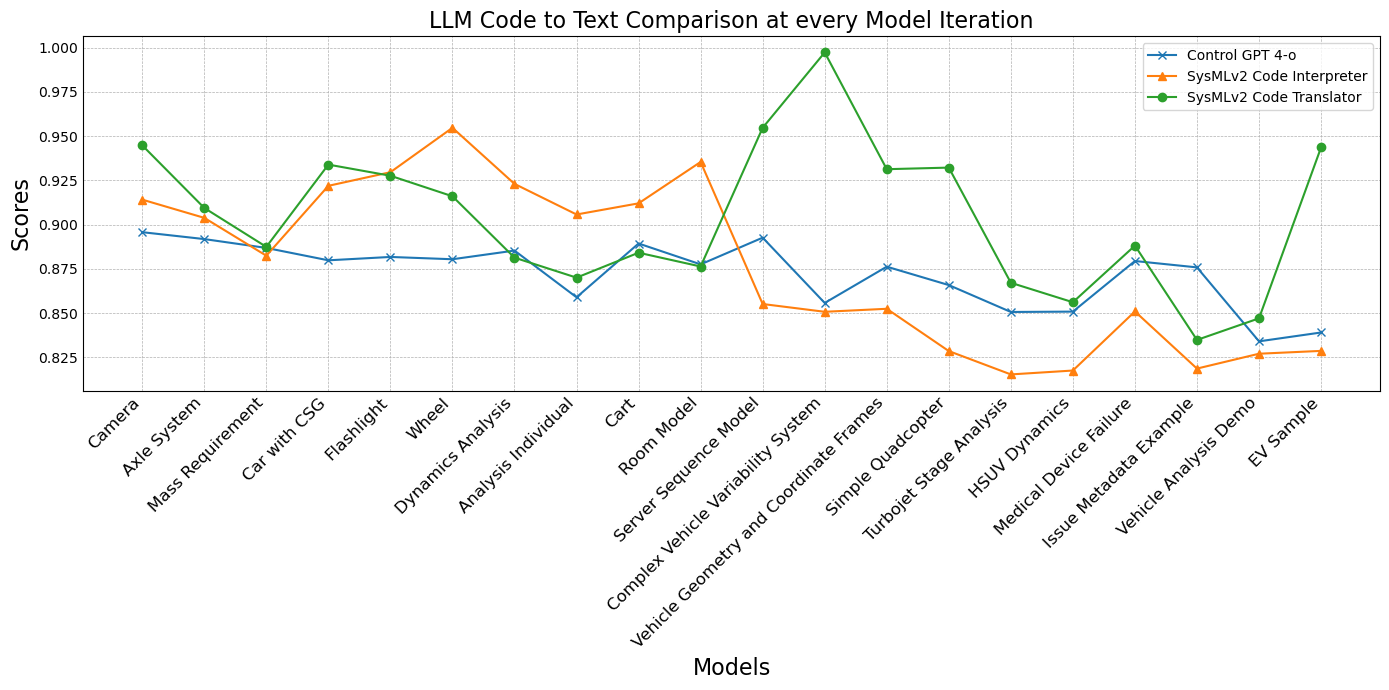

In [16]:
model_names = ['Camera', 'Axle System', 'Mass Requirement', 'Car with CSG', 'Flashlight', 'Wheel',
               'Dynamics Analysis', 'Analysis Individual', 'Cart', 'Room Model', 'Server Sequence Model',
               'Complex Vehicle Variability System', 'Vehicle Geometry and Coordinate Frames', 
               'Simple Quadcopter', 'Turbojet Stage Analysis', 'HSUV Dynamics', 'Medical Device Failure', 
               'Issue Metadata Example', 'Vehicle Analysis Demo', 'EV Sample']

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(model_names, control_scores, label='Control GPT 4-o', marker='x')
ax.plot(model_names, interpreter_scores, label='SysMLv2 Code Interpreter', marker='^')
ax.plot(model_names, translator_scores, label='SysMLv2 Code Translator', marker='o')
#ax.plot(model_names, mistral_scores, label='SysMLv2 Code Interpreter', marker='*')

ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.set_title('LLM Code to Text Comparison at every Model Iteration', fontsize=16)
ax.legend()

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Percent accurate')

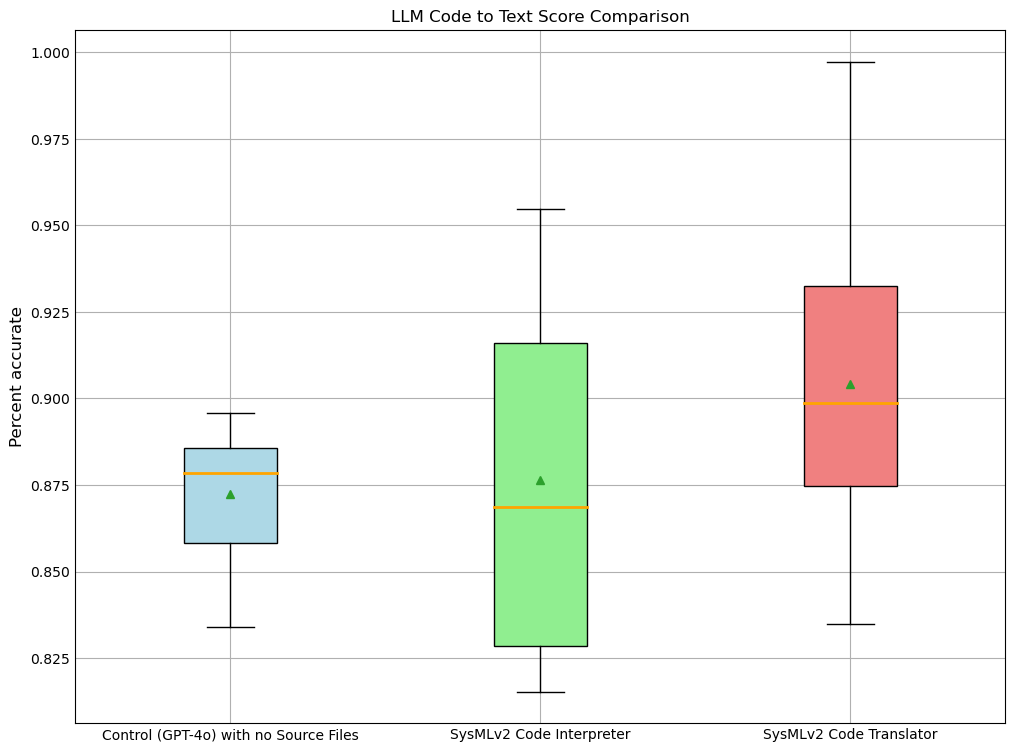

In [18]:
import matplotlib.pyplot as plt
import numpy as np

control_scores = [0.8957, 0.8918, 0.8868, 0.8798, 0.8817, 0.8804, 0.8853, 0.8589, 0.8893,
        0.8775, 0.8926, 0.8557, 0.8762, 0.8658, 0.8506, 0.8508, 0.8794, 0.8758,
        0.8340, 0.8390]

interpreter_scores = [0.9141, 0.9038, 0.8824, 0.9219, 0.9296, 0.9547, 0.9230, 0.9057, 0.9120,
        0.9354, 0.8551, 0.8507, 0.8524, 0.8285, 0.8153, 0.8175, 0.8509, 0.8186,
        0.8270, 0.8286]

translator_scores = [0.9448, 0.9094, 0.8874, 0.9339, 0.9276, 0.9160, 0.8813, 0.8700, 0.8841,
        0.8763, 0.9547, 0.9973, 0.9313, 0.9322, 0.8671, 0.8561, 0.8881, 0.8348,
        0.8470, 0.9436]

data = [control_scores, interpreter_scores, translator_scores]

plt.figure(figsize=(12,9))
box = plt.boxplot(data, labels=["Control (GPT-4o) with no Source Files", "SysMLv2 Code Interpreter", "SysMLv2 Code Translator"], patch_artist=True, showmeans = True)

colors = ['lightblue', 'lightgreen', 'lightcoral']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
      
for median in box['medians']:
    median.set_color("orange")
    median.set_linewidth(2)

plt.title("LLM Code to Text Score Comparison")
plt.ylabel("Percent accurate")

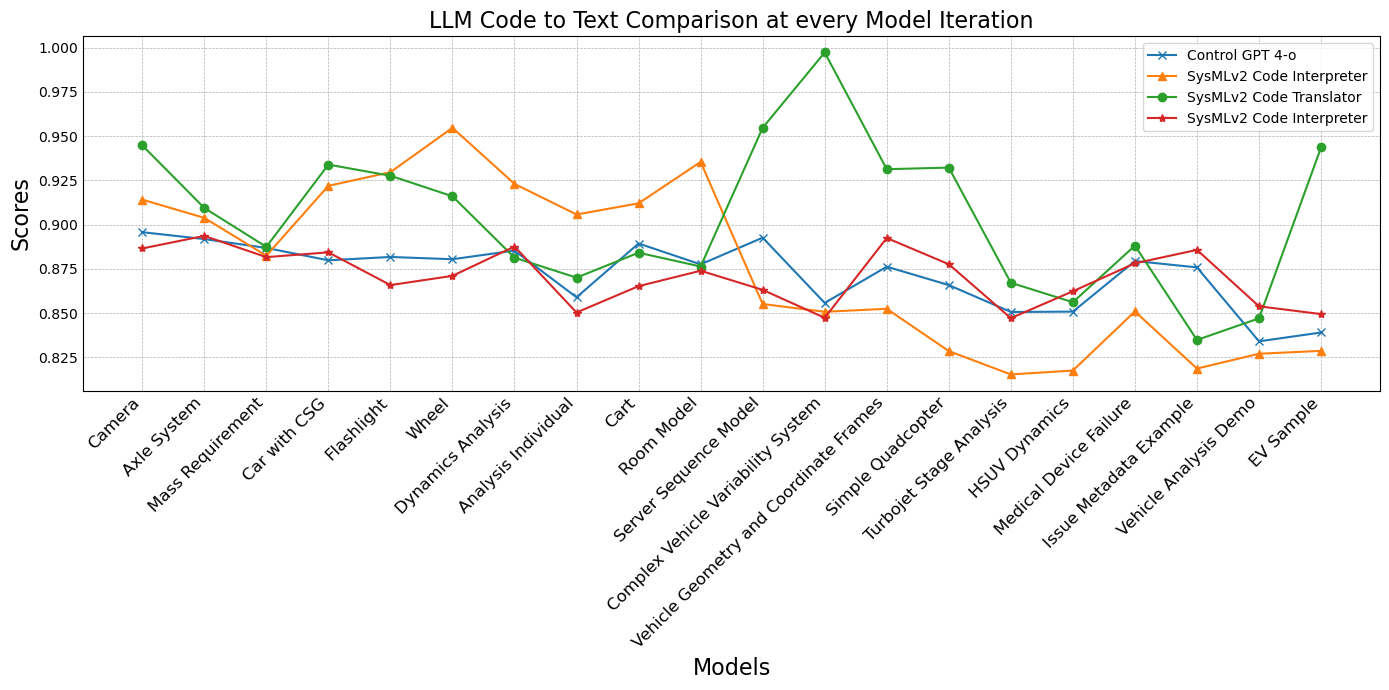

In [19]:
model_names = ['Camera', 'Axle System', 'Mass Requirement', 'Car with CSG', 'Flashlight', 'Wheel',
               'Dynamics Analysis', 'Analysis Individual', 'Cart', 'Room Model', 'Server Sequence Model',
               'Complex Vehicle Variability System', 'Vehicle Geometry and Coordinate Frames', 
               'Simple Quadcopter', 'Turbojet Stage Analysis', 'HSUV Dynamics', 'Medical Device Failure', 
               'Issue Metadata Example', 'Vehicle Analysis Demo', 'EV Sample']

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(model_names, control_scores, label='Control GPT 4-o', marker='x')
ax.plot(model_names, interpreter_scores, label='SysMLv2 Code Interpreter', marker='^')
ax.plot(model_names, translator_scores, label='SysMLv2 Code Translator', marker='o')
ax.plot(model_names, mistral_scores, label='SysMLv2 Code Interpreter', marker='*')

ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.set_title('LLM Code to Text Comparison at every Model Iteration', fontsize=16)
ax.legend()

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Percent accurate')

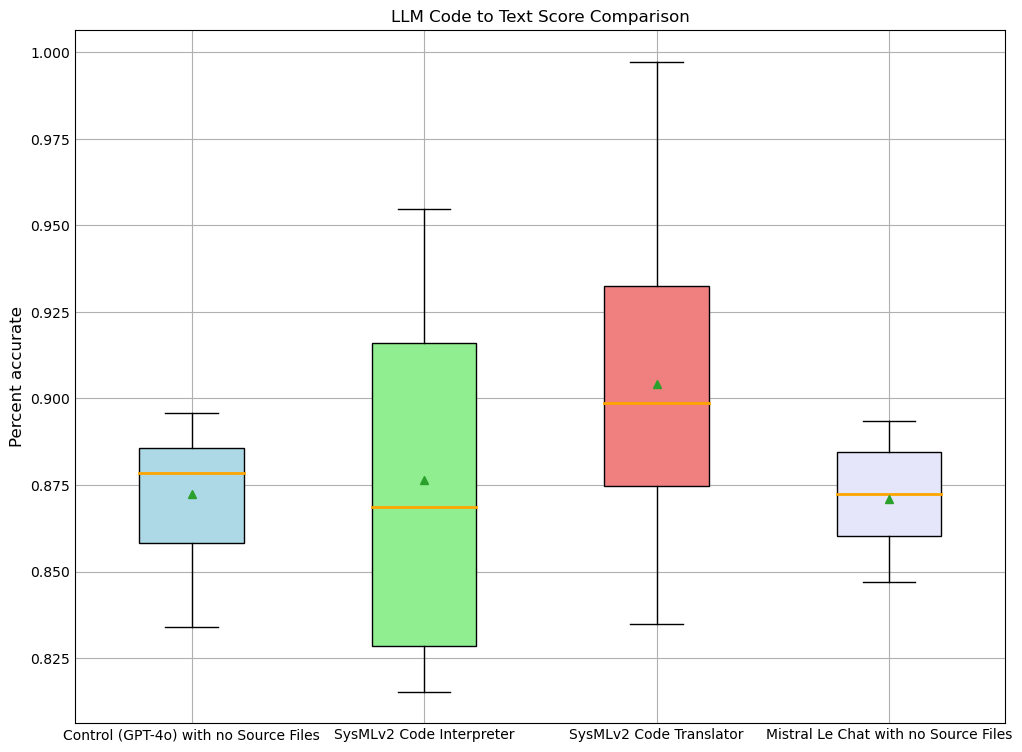

In [20]:
import matplotlib.pyplot as plt
import numpy as np

control_scores = [0.8957, 0.8918, 0.8868, 0.8798, 0.8817, 0.8804, 0.8853, 0.8589, 0.8893,
        0.8775, 0.8926, 0.8557, 0.8762, 0.8658, 0.8506, 0.8508, 0.8794, 0.8758,
        0.8340, 0.8390]

interpreter_scores = [0.9141, 0.9038, 0.8824, 0.9219, 0.9296, 0.9547, 0.9230, 0.9057, 0.9120,
        0.9354, 0.8551, 0.8507, 0.8524, 0.8285, 0.8153, 0.8175, 0.8509, 0.8186,
        0.8270, 0.8286]

translator_scores = [0.9448, 0.9094, 0.8874, 0.9339, 0.9276, 0.9160, 0.8813, 0.8700, 0.8841,
        0.8763, 0.9547, 0.9973, 0.9313, 0.9322, 0.8671, 0.8561, 0.8881, 0.8348,
        0.8470, 0.9436]

mistral_scores = [0.8865, 0.8936, 0.8816, 0.8843, 0.8658, 0.8710, 0.8876, 0.8503, 0.8652,
        0.8739, 0.8631, 0.8473, 0.8924, 0.8776, 0.8471, 0.8623, 0.8781, 0.8857,
        0.8538, 0.8494]

data = [control_scores, interpreter_scores, translator_scores, mistral_scores]

plt.figure(figsize=(12,9))
box = plt.boxplot(data, labels=["Control (GPT-4o) with no Source Files", "SysMLv2 Code Interpreter", "SysMLv2 Code Translator", "Mistral Le Chat with no Source Files"], patch_artist=True, showmeans = True)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lavender']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
      
for median in box['medians']:
    median.set_color("orange")
    median.set_linewidth(2)

plt.title("LLM Code to Text Score Comparison")
plt.ylabel("Percent accurate")